In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 909.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel('../input/result/marksheet.xlsx')
df

,name,gender,state,phy,maths,bio
0,rohan,male,mh,60,90,68
1,aniket,male,up,52,85,72
2,ganesh,male,up,45,82,78
3,meena,female,mp,72,69,80
4,seema,female,mh,68,90,78
5,dinesh,male,mp,48,34,67
6,yogita,female,mp,39,65,90
7,karan,male,mh,82,78,55
8,jayesh,male,up,87,88,32
9,mangesh,male,mp,91,78,82


In [4]:
df.shape

(15, 6)

In [5]:
df.dtypes

name      object
gender    object
state     object
phy        int64
maths      int64
bio        int64
dtype: object

## Data Visualization

In [6]:
df[df['phy']>90]

,name,gender,state,phy,maths,bio
9,mangesh,male,mp,91,78,82
13,binod,male,mh,95,78,88


### statement
* Only 2 students has score moore than 90 in phy

In [7]:
df[(df['state'].isin(['mp','up'])) & (df['gender']=='male')]

,name,gender,state,phy,maths,bio
1,aniket,male,up,52,85,72
2,ganesh,male,up,45,82,78
5,dinesh,male,mp,48,34,67
8,jayesh,male,up,87,88,32
9,mangesh,male,mp,91,78,82
12,tushar,male,up,32,92,77


## piovt Table
* Pivot table in pandas is an excellent tool to summarize one or more numeric variable based on two other categorical variables.

In [8]:
df.groupby(['state','gender'],sort=True).agg([np.sum,np.mean])

phy       maths         bio       
              sum  mean   sum   mean  sum   mean
state gender                                    
mh    female   99  49.5   148  74.00  156  78.00
      male    300  75.0   336  84.00  291  72.75
mp    female  111  55.5   134  67.00  170  85.00
      male    139  69.5   112  56.00  149  74.50
up    female   85  85.0    92  92.00   66  66.00
      male    216  54.0   347  86.75  259  64.75

### Same visualize by Bar Plot

0 phy
1 maths
2 bio


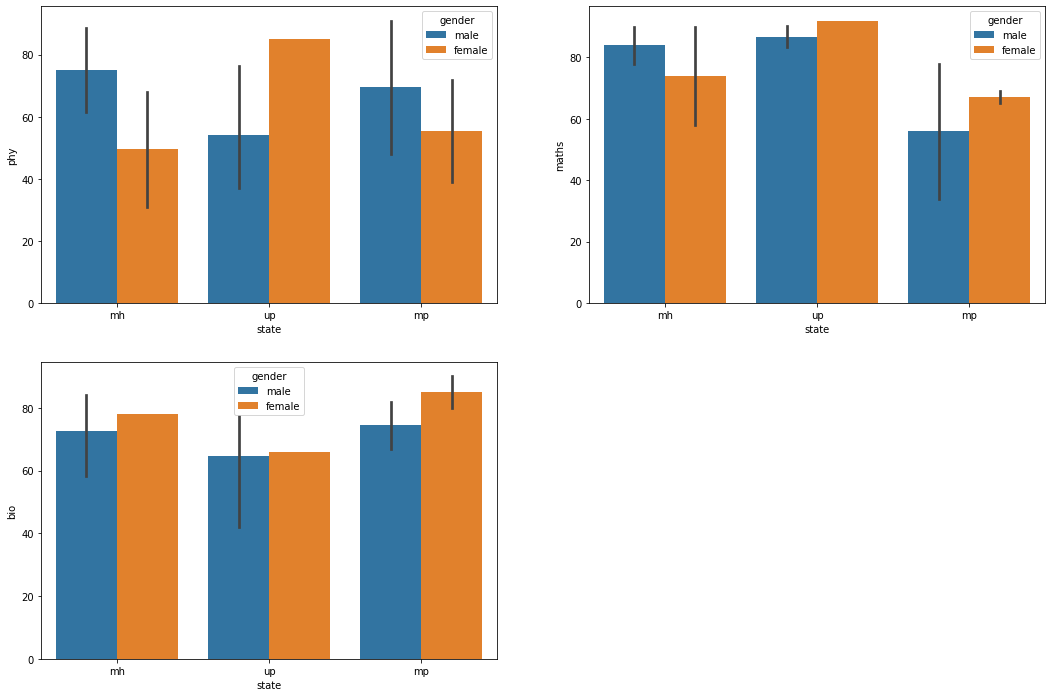

In [9]:
col=['phy', 'maths', 'bio'] #Create a list of input columns
plt.figure(figsize=(18,12))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(2,2,i+1)
    sns.barplot(x="state", y=v, data=df, hue="gender") 
plt.show()

### statement
* In mp average score of female in bio is higher than other states
* In UP average score of female and female in maths is higher than other states
* In maths score is less for male those belong to mp state
* In phy performace of female is very much less those belong to maharashtra state

## Bar Plot
* Pandas Bar Plot is a great way to visually compare 2 or more items together. Traditionally, bar plots use the y-axis to show how values compare to each other.

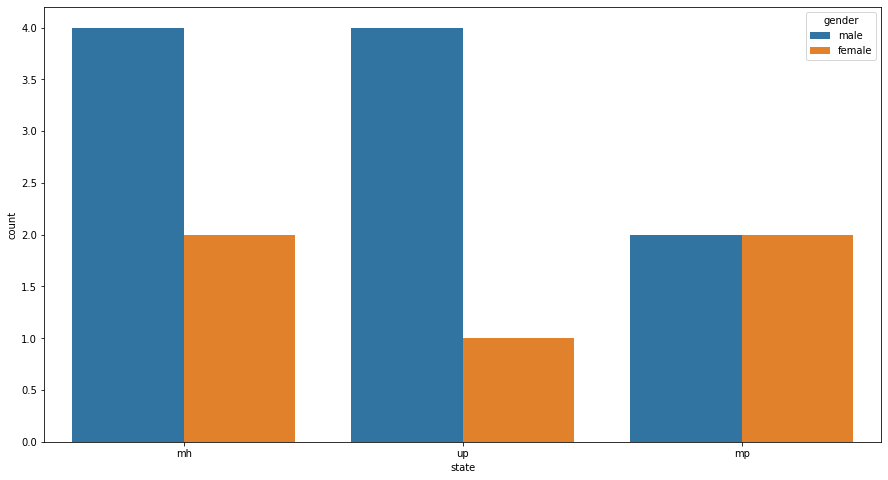

In [10]:
plt.figure(figsize=(15,8))
sns.countplot(data=df,x='state',hue='gender')
plt.show()

### statement
* Total no on male and Female in mp was same 
* In case of MP and UP taotal no of male are greater than female

### Avg score of male in mh

In [11]:
df[(df['state']=='mh') & (df['gender']=='male')].mean()

phy      75.00
maths    84.00
bio      72.75
dtype: float64

### Overall total per of Male and Female

In [12]:
df['gender'].value_counts()/df.shape[0]*100

male      66.666667
female    33.333333
Name: gender, dtype: float64

In [13]:
df1 = df.copy()

In [14]:
df1

,name,gender,state,phy,maths,bio
0,rohan,male,mh,60,90,68
1,aniket,male,up,52,85,72
2,ganesh,male,up,45,82,78
3,meena,female,mp,72,69,80
4,seema,female,mh,68,90,78
5,dinesh,male,mp,48,34,67
6,yogita,female,mp,39,65,90
7,karan,male,mh,82,78,55
8,jayesh,male,up,87,88,32
9,mangesh,male,mp,91,78,82


### Construct New feature of Total marks & Percentages

In [15]:
df1['total']=df1['phy']+df1['maths']+df1['bio']
df1

,name,gender,state,phy,maths,bio,total
0,rohan,male,mh,60,90,68,218
1,aniket,male,up,52,85,72,209
2,ganesh,male,up,45,82,78,205
3,meena,female,mp,72,69,80,221
4,seema,female,mh,68,90,78,236
5,dinesh,male,mp,48,34,67,149
6,yogita,female,mp,39,65,90,194
7,karan,male,mh,82,78,55,215
8,jayesh,male,up,87,88,32,207
9,mangesh,male,mp,91,78,82,251


### Calculate percentage of all students
* (Total marks / No of subject) * 100
* (Total marks / 3) * 100

In [16]:
df1['per']=(df1['total']/300)*100
df1['per']=df1['per'].round(2)

### Construct new feature called Grade :
* Calculate grade of each student base on their total marks
* marks > 85              ---- O
* marks<85 and marks>75   ---- A
* marks<75 and marks>65   ---- B
* marks<65 and marks>35   ---- C
* marks < 35             --- Fail

### Function for grade

In [17]:
def gd(no):
    if no>85:
        return "O"
    elif (no<85 and no>75):
        return "A"
    elif (no<75 and no>65):
        return "B"
    elif (no<65 and no>35):
        return "C"
    else:
        return "Fail"
df1['gradee']=df1['per'].apply(gd)

#List comprehension
* df1['grade']=["A" if x>85 else "B" if (x<85 and x>75) else "C" if (x<75 and x>65) else "D" for x in df1['per']]

### Consrtuct new feature result 
* student is pass only if he/she is passed all subject

In [18]:
df1['result']=''
a= list(zip(df1['phy'],df1['maths'],df1['bio']))
print(a)
for i,v in enumerate(a):
    if v[0]>35 and v[1]>35 and v[2]>35:
        df1['result'][i]="Pass"
    else:
        df1['result'][i]="Fail"

[(60, 90, 68), (52, 85, 72), (45, 82, 78), (72, 69, 80), (68, 90, 78), (48, 34, 67), (39, 65, 90), (82, 78, 55), (87, 88, 32), (91, 78, 82), (31, 58, 78), (85, 92, 66), (32, 92, 77), (95, 78, 88), (63, 90, 80)]


In [19]:
df1.rename(columns={'gradee':"grade"},inplace=True)

In [20]:
df1


,name,gender,state,phy,maths,bio,total,per,grade,result
0,rohan,male,mh,60,90,68,218,72.67,B,Pass
1,aniket,male,up,52,85,72,209,69.67,B,Pass
2,ganesh,male,up,45,82,78,205,68.33,B,Pass
3,meena,female,mp,72,69,80,221,73.67,B,Pass
4,seema,female,mh,68,90,78,236,78.67,A,Pass
5,dinesh,male,mp,48,34,67,149,49.67,C,Fail
6,yogita,female,mp,39,65,90,194,64.67,C,Pass
7,karan,male,mh,82,78,55,215,71.67,B,Pass
8,jayesh,male,up,87,88,32,207,69.00,B,Fail
9,mangesh,male,mp,91,78,82,251,83.67,A,Pass


In [21]:
for i,j in enumerate(df1['result']):
    if j=='Fail':
        df1['grade'][i]='Fail'
    continue

In [22]:
bn = np.linspace(24,100,5)
bn

array([ 24.,  43.,  62.,  81., 100.])

In [23]:
df1

,name,gender,state,phy,maths,bio,total,per,grade,result
0,rohan,male,mh,60,90,68,218,72.67,B,Pass
1,aniket,male,up,52,85,72,209,69.67,B,Pass
2,ganesh,male,up,45,82,78,205,68.33,B,Pass
3,meena,female,mp,72,69,80,221,73.67,B,Pass
4,seema,female,mh,68,90,78,236,78.67,A,Pass
5,dinesh,male,mp,48,34,67,149,49.67,Fail,Fail
6,yogita,female,mp,39,65,90,194,64.67,C,Pass
7,karan,male,mh,82,78,55,215,71.67,B,Pass
8,jayesh,male,up,87,88,32,207,69.00,Fail,Fail
9,mangesh,male,mp,91,78,82,251,83.67,A,Pass


### Data Distribution of per

<AxesSubplot:xlabel='per', ylabel='Density'>

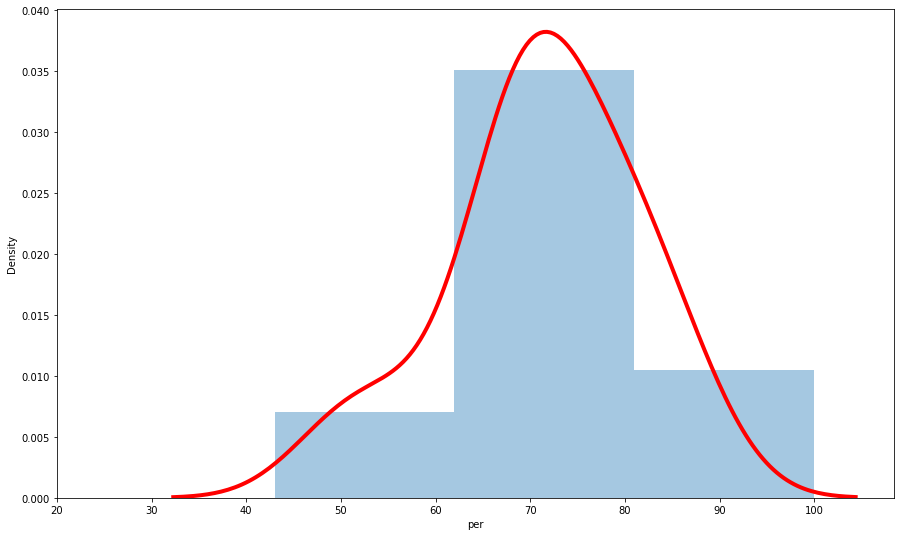

In [24]:
plt.figure(figsize=(15,9))   
sns.distplot(df1['per'],bins=bn,kde_kws={'linewidth':4,'color':'red','label':'before_modify'})

### statement
* as seen here average percentages of student is around 75

### Statistical Info of all subject columns

In [25]:
df1[['phy','maths','bio']].describe()

,phy,maths,bio
count,15.000000,15.000000,15.000000
mean,63.333333,77.933333,72.733333
std,21.668498,15.979749,14.389811
min,31.000000,34.000000,32.000000
25%,46.500000,73.500000,67.500000
50%,63.000000,82.000000,78.000000
75%,83.500000,90.000000,80.000000
max,95.000000,92.000000,90.000000


### All subjects marks distribution

Green : Maths
Red : Phy
Black : Bio


<AxesSubplot:xlabel='bio', ylabel='Density'>

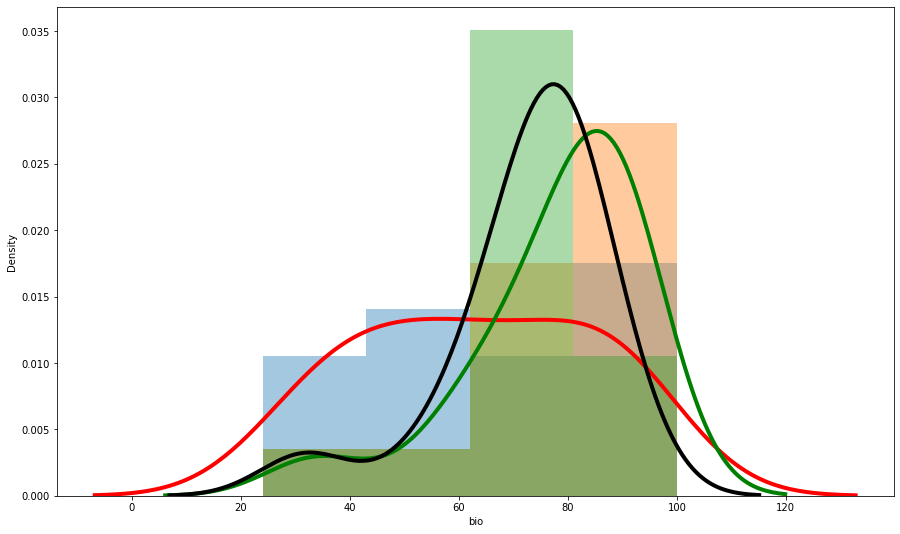

In [26]:
print("Green : Maths")
print("Red : Phy")
print("Black : Bio")
plt.figure(figsize=(15,9))   
sns.distplot(df1['phy'],bins=bn,kde_kws={'linewidth':4,'color':'red'})
sns.distplot(df1['maths'],bins=bn,kde_kws={'linewidth':4,'color':'green'})
sns.distplot(df1['bio'],bins=bn,kde_kws={'linewidth':4,'color':'k'})

### statement
* as seen here data distribution is almost normal except phy marks

### Box Plot : To Detect Outliers
* A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

0 phy
1 maths
2 bio


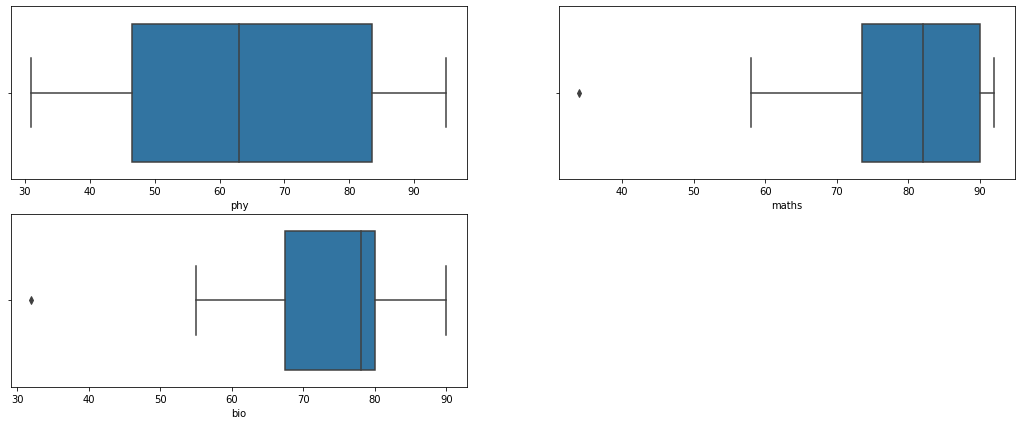

In [27]:
col=['phy', 'maths', 'bio'] #Create a list of input columns
plt.figure(figsize=(18,7))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(2,2,i+1)
    sns.boxplot(x=v, data=df1)
plt.show()

### Statement:
* In Bio and maths 2 students got very much less marks 32

In [28]:
df2 = df1.copy()
df2

,name,gender,state,phy,maths,bio,total,per,grade,result
0,rohan,male,mh,60,90,68,218,72.67,B,Pass
1,aniket,male,up,52,85,72,209,69.67,B,Pass
2,ganesh,male,up,45,82,78,205,68.33,B,Pass
3,meena,female,mp,72,69,80,221,73.67,B,Pass
4,seema,female,mh,68,90,78,236,78.67,A,Pass
5,dinesh,male,mp,48,34,67,149,49.67,Fail,Fail
6,yogita,female,mp,39,65,90,194,64.67,C,Pass
7,karan,male,mh,82,78,55,215,71.67,B,Pass
8,jayesh,male,up,87,88,32,207,69.00,Fail,Fail
9,mangesh,male,mp,91,78,82,251,83.67,A,Pass


### statements:
* 4 students get fail and those all are from mp and up (mh no one get fail)
* only 1 student got o grade 

### Consider only num features

In [29]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df2.select_dtypes(include=numerics)
num_df.drop(['total','per'],inplace=True,axis=1)

### Heat MAP : Visualize performance of students with each subject
* A heat map (or heatmap) is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions
* Visualize magnitude of data by its color intensity

<AxesSubplot:>

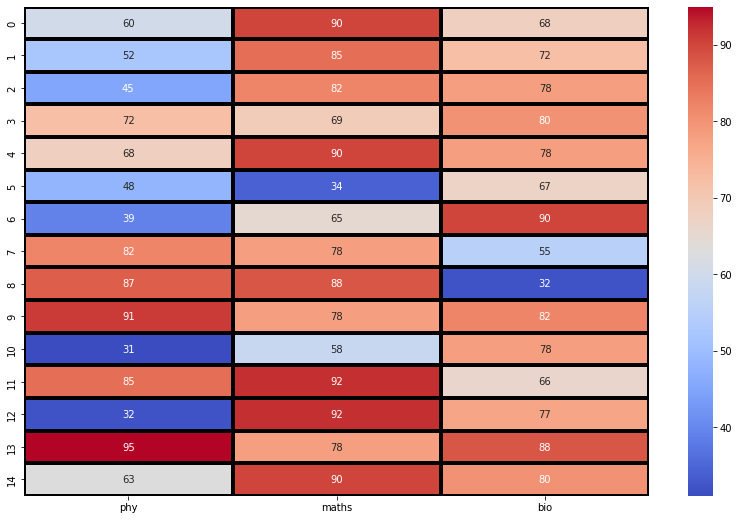

In [30]:
plt.figure(figsize=(14,9))
sns.heatmap(num_df,cmap="coolwarm", annot=True, cbar=True, linewidth=4, linecolor="k")

### statements

* As seen In Phy paper, most of students got less marks that is below 50 and there was 4-5 students those score is very high (above 85)
* so we conclude that phy paper was tough 
* In case of maths, paper was easy almost 80-90% students score more than 80 still there was only 2-3 students those score was very bad even paper was so easy
* In case of Bio, students perform almost AVERAGE only 1 studnet got 32 very poor so we can conclude that bio paper was so moderate
* final we can conclue that phy paper was very tough, maths was very easy , and bio some what easy that is moderate

### Visualize Percentages of all students

<AxesSubplot:>

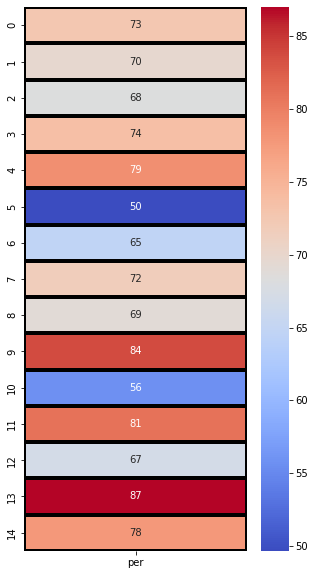

In [31]:
per_df = df2[['per']].copy()
plt.figure(figsize=(5,10))
sns.heatmap(per_df,cmap="coolwarm", annot=True, cbar=True, linewidth=4, linecolor="k")

### Statements
* as seen only 2 students got less than 50%
* Topper got 87% highest rank
* Only 3 students got more than 80%

In [32]:
df2[df2['state']=='mp']['per'].describe()

count     4.00000
mean     67.92000
std      14.43087
min      49.67000
25%      60.92000
50%      69.17000
75%      76.17000
max      83.67000
Name: per, dtype: float64

### Pandas GROUPBY :
* used to group similar categ together and used in conjuction with agg function such as min max mean etc

In [33]:
df2.groupby(['state']).mean()

,phy,maths,bio,total,per
state,,,,,
mh,66.5,80.666667,74.50,221.666667,73.891667
mp,62.5,61.500000,79.75,203.750000,67.920000
up,60.2,87.800000,65.00,213.000000,71.000000


### Result of 3 Differents states
* Avg per of mh is very high that is 74%
* Avg per of mp is less than others that is 68%

### Stat info all all subjects marks and percentages

In [34]:
df2.describe()

,phy,maths,bio,total,per
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,63.333333,77.933333,72.733333,214.000000,71.335333
std,21.668498,15.979749,14.389811,29.866369,9.955154
min,31.000000,34.000000,32.000000,149.000000,49.670000
25%,46.500000,73.500000,67.500000,203.000000,67.665000
50%,63.000000,82.000000,78.000000,215.000000,71.670000
75%,83.500000,90.000000,80.000000,234.500000,78.170000
max,95.000000,92.000000,90.000000,261.000000,87.000000


### statements:
* avg percentages of 12th board exam from 3 diff state is 71%
* avg score of phy - 63 less
* avg score of maths - 78 good
* avg score of bio - 72 good

## score of M/F

In [35]:
df2.groupby(['gender']).mean()

,phy,maths,bio,total,per
gender,,,,,
female,59.0,74.8,78.4,212.2,70.736
male,65.5,79.5,69.9,214.9,71.635


### Statements:
* as seen here gender is not matter
* average performance both of male and female is almost equal

### Pie Diagram 
*A pie chart (or a pie graph) is a circular statistical graphical chart, which is divided into slices in order to explain or illustrate numerical proportions.

<AxesSubplot:ylabel='gender'>

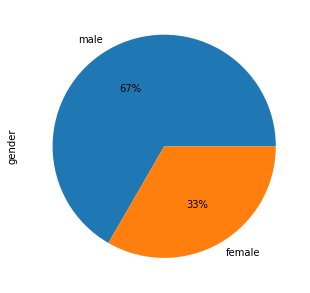

In [36]:
plt.figure(figsize=(5,10))
df2['gender'].value_counts().plot(kind='pie',autopct='%1.0f%%')

### statements:
* percetages of total male appear for exam was more than female
* male - 67 & female -33

### Percentages of students state wise

<AxesSubplot:ylabel='state'>

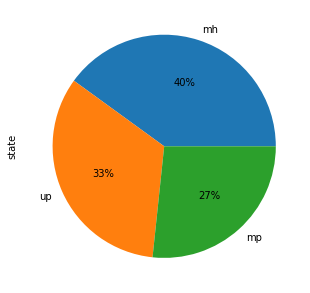

In [37]:
plt.figure(figsize=(5,10))
df2['state'].value_counts().plot(kind='pie',autopct='%1.0f%%')

### statements:
* highest students was from up which is 40%

In [38]:
df2['state'].value_counts()

mh    6
up    5
mp    4
Name: state, dtype: int64

### For any query feel free to contact me 9987353543